In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, f1_score

In [3]:
data = pd.read_csv("").dropna()
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
X = data.iloc[:, 1:-1].values
Y = data.iloc[:, -1].values

In [9]:
from sklearn.preprocessing import LabelEncoder
yLabelEncoder = LabelEncoder()
Y = yLabelEncoder.fit_transform(Y)
Y

In [11]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, train_size=0.8, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
xScale = StandardScaler()
xScale.fit(X)
xTrain = xScale.transform(xTrain)
xTest = xScale.transform(xTest)

Classifier

In [14]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [19]:
baseClassifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('et', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='linear', probability=True, random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42))
]

In [20]:
staxifier = StackingClassifier(
    estimators = baseClassifiers,
    final_estimator = LogisticRegression(max_iter=1000),
    stack_method = 'auto',
    n_jobs = -1
)

staxifier.fit(xTrain, yTrain)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('et', ExtraTreesClassifier(random_state=42)),
                               ('ada',
                                AdaBoostClassifier(n_estimators=100,
                                                   random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42)),
                               ('hgbc',
                                HistGradientBoostingClassifier(random_state=42)),
                               ('svm',
                                SVC(kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('mlp',
                                MLPClassifier(max_iter=1000, random_state=42))],
                   final_estimator=LogisticRegression(max_iter=1000),
                   n_jobs=-1)

In [23]:
predictions = staxifier.predict(xTest)

accuracy = accuracy_score(yTest, predictions)
presicion = precision_score(yTest, predictions, average='macro')
recall = recall_score(yTest, predictions, average='macro')
f1Score = f1_score(yTest, predictions, average='macro')
confusionMatrix = confusion_matrix(yTest, predictions)

print("Metric Scores")
print("Accuracy: " + str(accuracy*100))
print("Precision: " + str(presicion*100))
print("Recall: " + str(recall*100))
print("f1 Score: " + str(f1Score*100))

Metric Scores
Accuracy: 100.0
Precision: 100.0
Recall: 100.0
f1 Score: 100.0


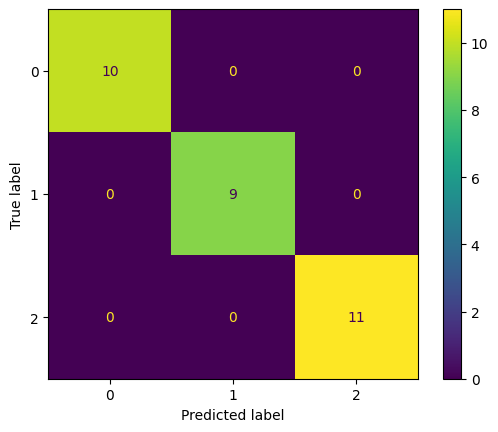

In [24]:
confusionMatrix = confusion_matrix(yTest, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = confusionMatrix)
disp.plot()
plt.show()